# Reading and Understanding the Data


In [1]:
# importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

C:\Users\veemu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
C:\Users\veemu\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\veemu\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specific

In [2]:
#importing warning to avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the csv file
bike = pd.read_csv("C:\\Users\\veemu\\Desktop\\upGrad\\Machine learning 1\\3.Linear regression assignment\\day.csv")

In [4]:
#Checking the head of dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Checking information of dataset
bike.info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
5          6  06-01-2018       1   0     1        0        4           1   
6          7  07-01-2018       1   0     1        0        5           1   
7          8  08-01-2018       1   0     1        0        6           0   
8          9  09-01-2018       1   0     1        0        0           0   
9         10  10-01-2018       1   0     1        0        1           1   
10        11  11-01-2018       1   0     1        0        2           1   
11        12  12-01-2018       1   0     1        0     

Except one column, all other are either float or integer type.

One column is date type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.

In [6]:
bike.describe

<bound method NDFrame.describe of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
5          6  06-01-2018       1   0     1        0        4           1   
6          7  07-01-2018       1   0     1        0        5           1   
7          8  08-01-2018       1   0     1        0        6           0   
8          9  09-01-2018       1   0     1        0        0           0   
9         10  10-01-2018       1   0     1        0        1           1   
10        11  11-01-2018       1   0     1        0        2           1   
11        12  12-01-2018       1   0     1        0   

In [7]:
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
#Converting the season,yr,mth,holiday,weekday,workingday and weathersit to object type.
bike['season']=bike['season'].astype('object')
bike['yr']=bike['yr'].astype('object')
bike['mnth']=bike['mnth'].astype('object')
bike['holiday']=bike['holiday'].astype('object')
bike['weekday']=bike['weekday'].astype('object')
bike['workingday']=bike['workingday'].astype('object')
bike['weathersit']=bike['weathersit'].astype('object')

In [9]:
#Checking the datatypes
bike.dtypes

instant         int64
dteday         object
season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
#Checking the shape of dataset
bike.shape

(730, 16)

# Visualising the Data

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

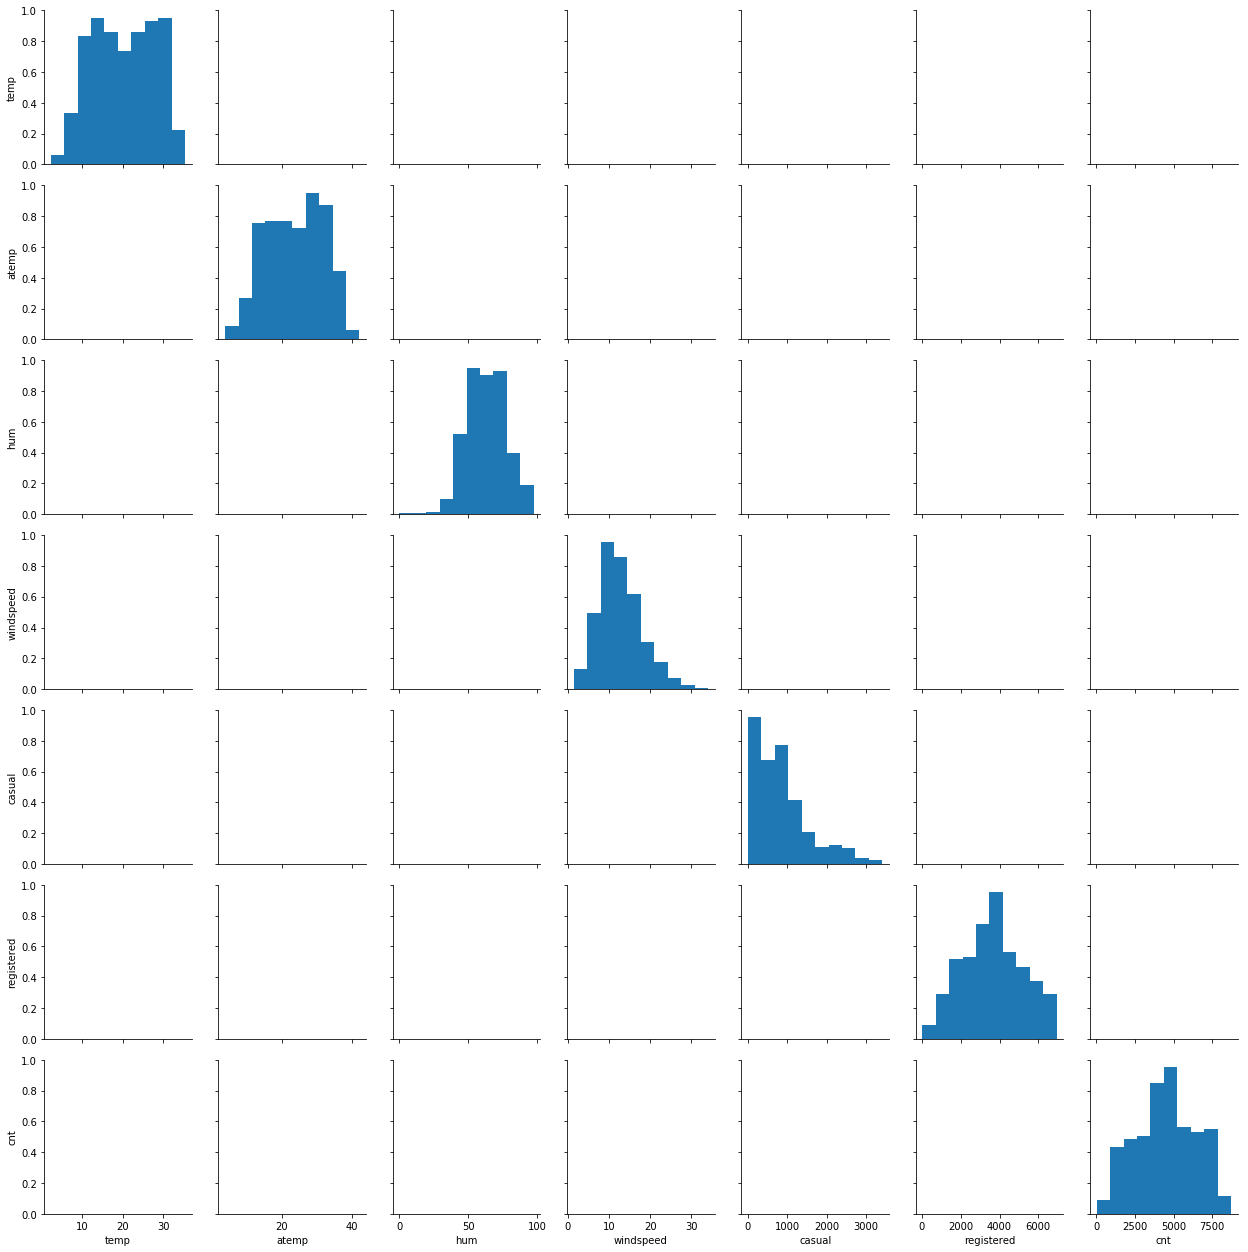

In [11]:
#Creating pairplots for the continous variables
sns.pairplot(bike[['temp','atemp','hum','windspeed','casual','registered','cnt']])

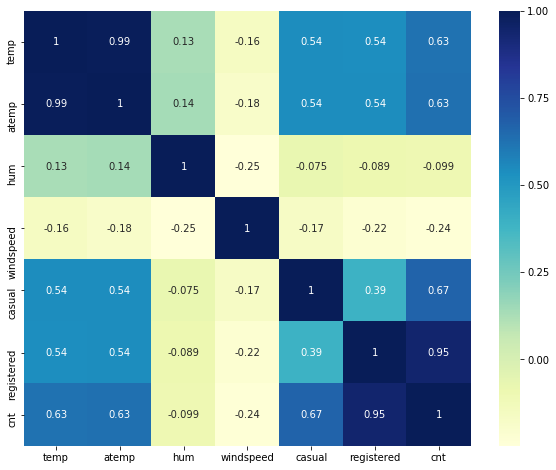

In [12]:
#Ploting the correlation between the columns.
plt.figure(figsize=(10,8))
sns.heatmap(bike[['temp','atemp','hum','windspeed','casual','registered','cnt']].corr(),annot=True, cmap="YlGnBu")

atemp:As the temp and atemp are highly collinear so we can remove atemp as we have temp which is same as atemp.

instant :As it is an index value we can remove this column.


In [ ]:
#Droping the columns casual,registered,dteday,atmep and instant 
bike=bike.drop(columns=['atemp','instant','casual','registered','dteday'])

dteday : It is date column, since we already have seperate columns for 'year' & 'month',hence we could live without this column.

casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

In [ ]:
bike.head()

In [ ]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt'
plt.figure(figsize=(30,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

As we can see from the above box plots which shows the change in count with repective to different class.

mnt:As we can see 7th month has high count of bikes booked as compared to other months.

holiday: As we can see that there is slight change in median between '0' and '1'.

weekday: As we can see there not much change in the respective days.


In [ ]:
bike['temp_class']=bike['temp'].apply(lambda x: 'low'if x<20 else 'high')
bike.head()

In [ ]:
sns.boxplot(y=bike['cnt'],x = bike['temp_class'])

In [ ]:
bike['hum_class']=bike['hum'].apply(lambda x: 'low'if x < 62.625 else 'high')
bike.head()

In [ ]:
sns.boxplot(y=bike['cnt'],x = bike['hum_class'])

In [ ]:
bike['wind_class']=bike['windspeed'].apply(lambda x: 'low'if x < 12.125 else 'high ')
bike.head()

In [ ]:
sns.boxplot(y=bike['cnt'],x = bike['wind_class'])

In [ ]:
#Droping the columns temp_class,hum_class,wind_class
bike=bike.drop(columns=['temp_class','hum_class','wind_class'],axis=1)

In [ ]:
# Check the bike dataframe now
bike.head()

In [ ]:
bike.shape

In [ ]:
#Creating dummy columns 
bike = pd.get_dummies(bike,drop_first=True)

In [ ]:
bike.shape

In [ ]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train,df_test = train_test_split(bike,train_size=0.7,random_state=100)

In [ ]:
Scaler =MinMaxScaler()
df_train[['temp','windspeed','hum','cnt']]

In [ ]:
df_train[['temp','windspeed','hum','cnt']] = Scaler.fit_transform(df_train[['temp','windspeed','hum','cnt']])

In [ ]:
df_train_copy = df_train[df_train.columns]
df_train_copy

In [ ]:
df_train.head()

In [ ]:
y_train = df_train.pop('cnt')
X_train = df_train

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr,14)
rfe = rfe.fit(X_train,y_train)

In [ ]:
rfe.support_

In [ ]:
dict_1 ={'columns': X_train.columns,'support':rfe.support_}

In [ ]:
dict_1

In [ ]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [ ]:
X_train_rfe.shape

# Checking VIF

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.

The VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.


In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_lr = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_lr)
lr = lr.fit()
lr.summary()

In [ ]:
#As VIF and p value is high for month,We can remove the month
X_train_rfe=X_train_rfe.drop(columns=['hum'],axis=1)

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_lr = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_lr)
lr = lr.fit()
lr.summary()

In [ ]:
#As VIF and p value is high for month,We can remove the month
X_train_rfe=X_train_rfe.drop(columns=['mnth_10'],axis=1)

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_lr = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_lr)
lr = lr.fit()
lr.summary()

In [ ]:
#As VIF and p value is high for month,We can remove the month
X_train_rfe=X_train_rfe.drop(columns=['holiday_1'])

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_lr = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_lr)
lr = lr.fit()
lr.summary()

In [ ]:
# Finding the y_train predicted value
y_train_pred = lr.predict(X_train_lr)

In [ ]:
print(y_train-y_train_pred)

In [ ]:
# ploting the distribution of the error terms
sns.distplot(y_train-y_train_pred)

In [ ]:
df_test[['temp','hum','windspeed','cnt']] = Scaler.transform(df_test[['temp','hum','windspeed','cnt']])

In [ ]:
df_test

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test_rfe = X_test[X_train_rfe.columns]

In [ ]:
X_test_rfe

In [ ]:
X_test_lr = sm.add_constant(X_test_rfe)
y_test_pred = lr.predict(X_test_lr)

In [ ]:
r2_score(y_test,y_test_pred)

In [ ]:
# We already have the value of R^2 (calculated in above step)
r2=0.7886540992056704

In [ ]:
# n is number of rows in X

n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]
#We find the Adjusted R-squared using the formula

adjusted_r2_score = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2_score

Train R^2 :0.838

Train Adjusted R^2 :0.835

Test R^2 :0.788

Test Adjusted R^2 :0.757

In [ ]:
lr.params

1.If there is 1 unit raise in temperature then there is increase of bike rental by 0.52.

2.If there is 1 unit raise in weathersit_3 then there is decrease of bike rental by -0.28.

3.If there is 1 unit raise in yr_1 then there is increase of bike rental by 0.23.

4.If there is 1 unit raise in windspeed then there is decrease of bike rental by -0.151.

temp,yr_1,weathersit_3 has higher impact on bike rentals when compared other independent variables.